In [1]:
import pandas as pd
 
# read json into a dataframe
df=pd.read_json("stackoverflow-data-idf.json",lines=True)
 
# print schema
print("Schema:\n\n",df.dtypes)
print("Number of questions,columns=",df.shape)

Schema:

 accepted_answer_id          float64
answer_count                  int64
body                         object
comment_count                 int64
community_owned_date         object
creation_date                object
favorite_count              float64
id                            int64
last_activity_date           object
last_edit_date               object
last_editor_display_name     object
last_editor_user_id         float64
owner_display_name           object
owner_user_id               float64
post_type_id                  int64
score                         int64
tags                         object
title                        object
view_count                    int64
dtype: object
Number of questions,columns= (20000, 19)


In [2]:
df.head()

,accepted_answer_id,answer_count,body,comment_count,community_owned_date,creation_date,favorite_count,id,last_activity_date,last_edit_date,last_editor_display_name,last_editor_user_id,owner_display_name,owner_user_id,post_type_id,score,tags,title,view_count
0,NaN,1,<p>I have a public class that contains a priva...,0,NaN,2011-01-27 20:19:13.563 UTC,NaN,4821394,2011-01-27 20:21:37.59 UTC,NaN,,NaN,,163534.0,1,0,c#|serialization|xml-serialization,Serializing a private struct - Can it be done?,296
1,3367943.0,2,<p>I have the following HTML:</p>\n\n<pre><cod...,2,NaN,2010-07-30 00:01:50.9 UTC,0.0,3367882,2012-05-10 14:16:05.143 UTC,2012-05-10 14:16:05.143 UTC,,44390.0,,1190.0,1,2,css|overflow|css-float|crop,How do I prevent floated-right content from ov...,4121
2,NaN,0,<p>I'm trying to run a shell script with gradl...,2,NaN,2015-07-28 16:30:18.28 UTC,NaN,31682135,2015-07-28 16:32:15.117 UTC,NaN,,NaN,,1299158.0,1,1,bash|shell|android-studio|gradle,Gradle command line,259
3,NaN,1,<p>I have an object with the following form.</...,1,NaN,2013-11-26 13:34:49.957 UTC,1.0,20218536,2013-11-26 15:07:50.8 UTC,2013-11-26 15:02:47.993 UTC,,1333873.0,,642751.0,1,0,javascript|asynchronous|foreach|async.js,Loop variable as parameter in asynchronous fun...,120
4,19941620.0,5,<p>Hi I need to valid the href is empty or not...,1,NaN,2013-11-12 22:41:36.11 UTC,NaN,19941459,2013-11-12 23:48:34.67 UTC,2013-11-12 22:43:42.97 UTC,,21886.0,,819774.0,1,0,javascript,Canot get the href value,97


In [3]:
#import necessary packages for analysis 
import nltk
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [4]:
df['labels'] = df['tags'].str.split('|')

In [5]:
df.head()

,accepted_answer_id,answer_count,body,comment_count,community_owned_date,creation_date,favorite_count,id,last_activity_date,last_edit_date,last_editor_display_name,last_editor_user_id,owner_display_name,owner_user_id,post_type_id,score,tags,title,view_count,labels
0,NaN,1,<p>I have a public class that contains a priva...,0,NaN,2011-01-27 20:19:13.563 UTC,NaN,4821394,2011-01-27 20:21:37.59 UTC,NaN,,NaN,,163534.0,1,0,c#|serialization|xml-serialization,Serializing a private struct - Can it be done?,296,"[c#, serialization, xml-serialization]"
1,3367943.0,2,<p>I have the following HTML:</p>\n\n<pre><cod...,2,NaN,2010-07-30 00:01:50.9 UTC,0.0,3367882,2012-05-10 14:16:05.143 UTC,2012-05-10 14:16:05.143 UTC,,44390.0,,1190.0,1,2,css|overflow|css-float|crop,How do I prevent floated-right content from ov...,4121,"[css, overflow, css-float, crop]"
2,NaN,0,<p>I'm trying to run a shell script with gradl...,2,NaN,2015-07-28 16:30:18.28 UTC,NaN,31682135,2015-07-28 16:32:15.117 UTC,NaN,,NaN,,1299158.0,1,1,bash|shell|android-studio|gradle,Gradle command line,259,"[bash, shell, android-studio, gradle]"
3,NaN,1,<p>I have an object with the following form.</...,1,NaN,2013-11-26 13:34:49.957 UTC,1.0,20218536,2013-11-26 15:07:50.8 UTC,2013-11-26 15:02:47.993 UTC,,1333873.0,,642751.0,1,0,javascript|asynchronous|foreach|async.js,Loop variable as parameter in asynchronous fun...,120,"[javascript, asynchronous, foreach, async.js]"
4,19941620.0,5,<p>Hi I need to valid the href is empty or not...,1,NaN,2013-11-12 22:41:36.11 UTC,NaN,19941459,2013-11-12 23:48:34.67 UTC,2013-11-12 22:43:42.97 UTC,,21886.0,,819774.0,1,0,javascript,Canot get the href value,97,[javascript]


In [6]:
def return_tags(labels):
    langauges = labels[0]
    return langauges

In [7]:
df['lang_label'] = df['labels'].apply(return_tags)

def lst_to_str(lst):
    unpacked = ''.join(lst)
    return unpacked

processed_df.loc[:,'lang_label'] = processed_df.loc[:,'lang_label'].apply(lst_to_str)

In [8]:
df.head()

,accepted_answer_id,answer_count,body,comment_count,community_owned_date,creation_date,favorite_count,id,last_activity_date,last_edit_date,...,last_editor_user_id,owner_display_name,owner_user_id,post_type_id,score,tags,title,view_count,labels,lang_label
0,NaN,1,<p>I have a public class that contains a priva...,0,NaN,2011-01-27 20:19:13.563 UTC,NaN,4821394,2011-01-27 20:21:37.59 UTC,NaN,...,NaN,,163534.0,1,0,c#|serialization|xml-serialization,Serializing a private struct - Can it be done?,296,"[c#, serialization, xml-serialization]",c#
1,3367943.0,2,<p>I have the following HTML:</p>\n\n<pre><cod...,2,NaN,2010-07-30 00:01:50.9 UTC,0.0,3367882,2012-05-10 14:16:05.143 UTC,2012-05-10 14:16:05.143 UTC,...,44390.0,,1190.0,1,2,css|overflow|css-float|crop,How do I prevent floated-right content from ov...,4121,"[css, overflow, css-float, crop]",css
2,NaN,0,<p>I'm trying to run a shell script with gradl...,2,NaN,2015-07-28 16:30:18.28 UTC,NaN,31682135,2015-07-28 16:32:15.117 UTC,NaN,...,NaN,,1299158.0,1,1,bash|shell|android-studio|gradle,Gradle command line,259,"[bash, shell, android-studio, gradle]",bash
3,NaN,1,<p>I have an object with the following form.</...,1,NaN,2013-11-26 13:34:49.957 UTC,1.0,20218536,2013-11-26 15:07:50.8 UTC,2013-11-26 15:02:47.993 UTC,...,1333873.0,,642751.0,1,0,javascript|asynchronous|foreach|async.js,Loop variable as parameter in asynchronous fun...,120,"[javascript, asynchronous, foreach, async.js]",javascript
4,19941620.0,5,<p>Hi I need to valid the href is empty or not...,1,NaN,2013-11-12 22:41:36.11 UTC,NaN,19941459,2013-11-12 23:48:34.67 UTC,2013-11-12 22:43:42.97 UTC,...,21886.0,,819774.0,1,0,javascript,Canot get the href value,97,[javascript],javascript


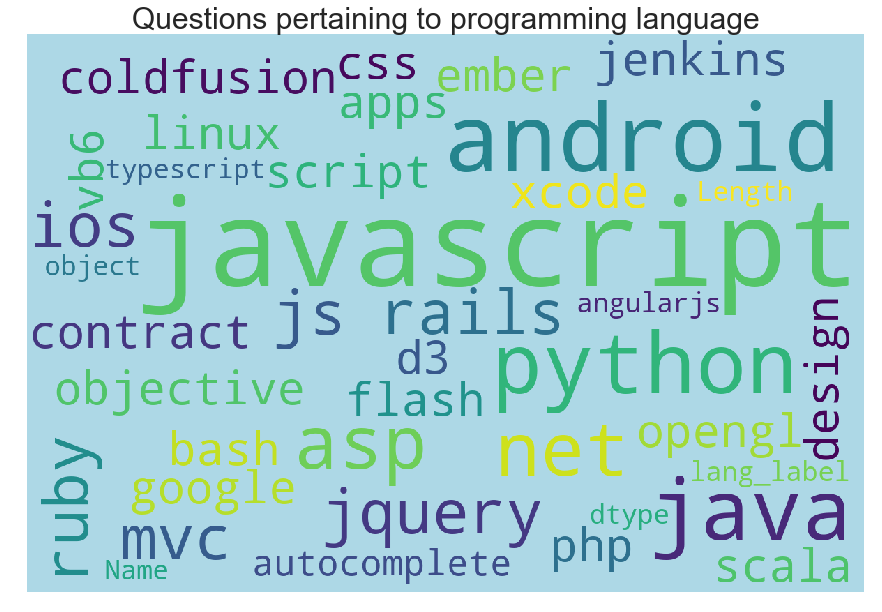

In [9]:
# most common language questions

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'lightblue', stopwords = stopwords, max_words = 100, width = 1200, height = 800).generate(str(df['lang_label']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Questions pertaining to programming language', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

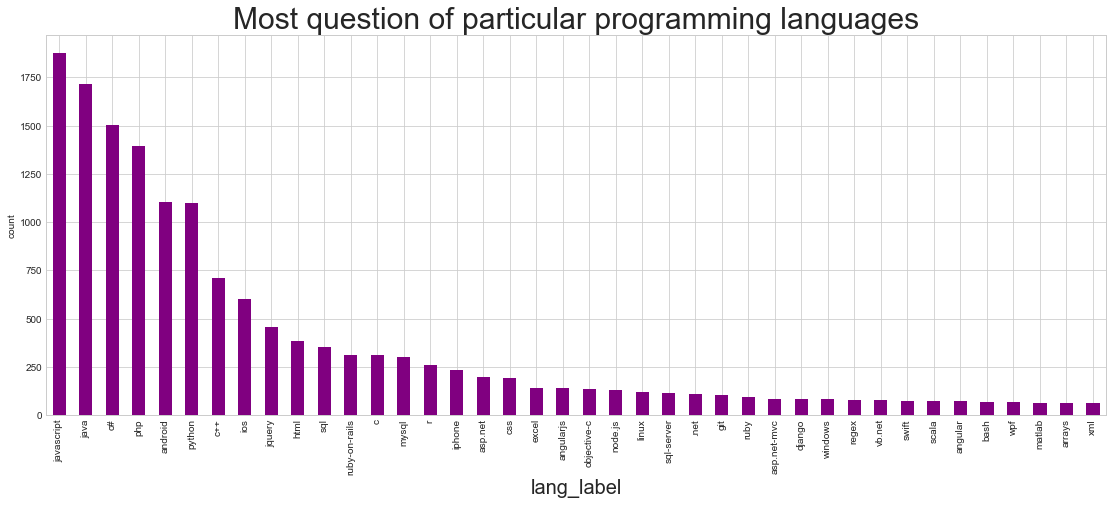

In [10]:
# Most common programming language
df['lang_label'].value_counts().head(40).plot.bar(figsize = (19, 7), color = 'purple')
plt.title('Most question of particular programming languages', fontsize = 30)
plt.xlabel('lang_label', fontsize = 20)
plt.ylabel('count')
plt.show()

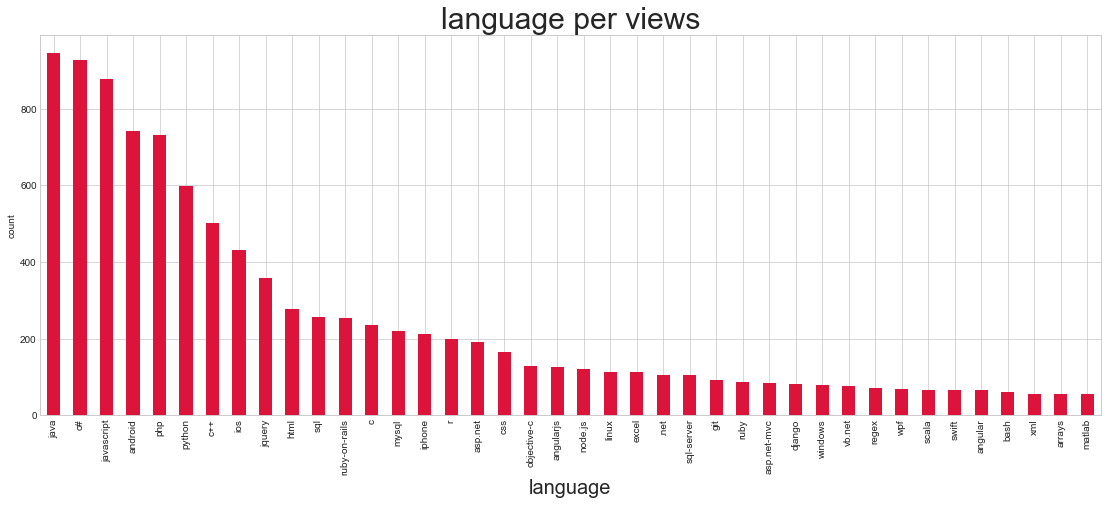

In [11]:
# language per views
df.groupby(['lang_label'])['view_count'].nunique().sort_values(ascending = False).head(40).plot.bar(figsize = (19, 7), color = 'crimson')
plt.title('language per views', fontsize = 30)
plt.xlabel('language', fontsize = 20)
plt.ylabel('count')
plt.show()

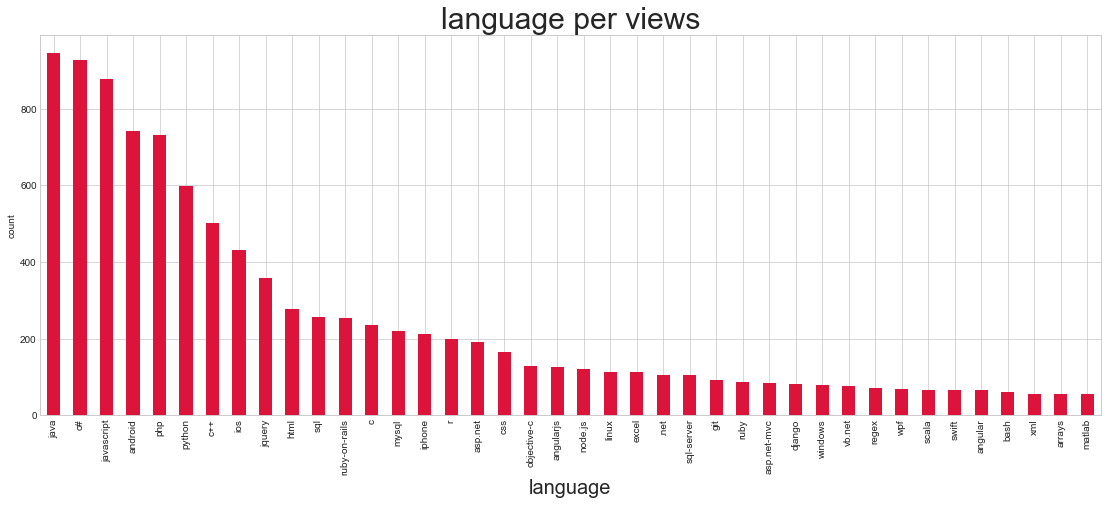

In [12]:
# views per language
df.groupby(['lang_label'])['view_count'].nunique().sort_values(ascending = False).head(40).plot.bar(figsize = (19, 7), color = 'crimson')
plt.title('language per views', fontsize = 30)
plt.xlabel('language', fontsize = 20)
plt.ylabel('count')
plt.show()

In [13]:
df.head()

,accepted_answer_id,answer_count,body,comment_count,community_owned_date,creation_date,favorite_count,id,last_activity_date,last_edit_date,...,last_editor_user_id,owner_display_name,owner_user_id,post_type_id,score,tags,title,view_count,labels,lang_label
0,NaN,1,<p>I have a public class that contains a priva...,0,NaN,2011-01-27 20:19:13.563 UTC,NaN,4821394,2011-01-27 20:21:37.59 UTC,NaN,...,NaN,,163534.0,1,0,c#|serialization|xml-serialization,Serializing a private struct - Can it be done?,296,"[c#, serialization, xml-serialization]",c#
1,3367943.0,2,<p>I have the following HTML:</p>\n\n<pre><cod...,2,NaN,2010-07-30 00:01:50.9 UTC,0.0,3367882,2012-05-10 14:16:05.143 UTC,2012-05-10 14:16:05.143 UTC,...,44390.0,,1190.0,1,2,css|overflow|css-float|crop,How do I prevent floated-right content from ov...,4121,"[css, overflow, css-float, crop]",css
2,NaN,0,<p>I'm trying to run a shell script with gradl...,2,NaN,2015-07-28 16:30:18.28 UTC,NaN,31682135,2015-07-28 16:32:15.117 UTC,NaN,...,NaN,,1299158.0,1,1,bash|shell|android-studio|gradle,Gradle command line,259,"[bash, shell, android-studio, gradle]",bash
3,NaN,1,<p>I have an object with the following form.</...,1,NaN,2013-11-26 13:34:49.957 UTC,1.0,20218536,2013-11-26 15:07:50.8 UTC,2013-11-26 15:02:47.993 UTC,...,1333873.0,,642751.0,1,0,javascript|asynchronous|foreach|async.js,Loop variable as parameter in asynchronous fun...,120,"[javascript, asynchronous, foreach, async.js]",javascript
4,19941620.0,5,<p>Hi I need to valid the href is empty or not...,1,NaN,2013-11-12 22:41:36.11 UTC,NaN,19941459,2013-11-12 23:48:34.67 UTC,2013-11-12 22:43:42.97 UTC,...,21886.0,,819774.0,1,0,javascript,Canot get the href value,97,[javascript],javascript


In [14]:
df.loc[:,'length_of_question'] = df.loc[:,'body'].apply(len)

In [15]:
df.head()

,accepted_answer_id,answer_count,body,comment_count,community_owned_date,creation_date,favorite_count,id,last_activity_date,last_edit_date,...,owner_display_name,owner_user_id,post_type_id,score,tags,title,view_count,labels,lang_label,length_of_question
0,NaN,1,<p>I have a public class that contains a priva...,0,NaN,2011-01-27 20:19:13.563 UTC,NaN,4821394,2011-01-27 20:21:37.59 UTC,NaN,...,,163534.0,1,0,c#|serialization|xml-serialization,Serializing a private struct - Can it be done?,296,"[c#, serialization, xml-serialization]",c#,386
1,3367943.0,2,<p>I have the following HTML:</p>\n\n<pre><cod...,2,NaN,2010-07-30 00:01:50.9 UTC,0.0,3367882,2012-05-10 14:16:05.143 UTC,2012-05-10 14:16:05.143 UTC,...,,1190.0,1,2,css|overflow|css-float|crop,How do I prevent floated-right content from ov...,4121,"[css, overflow, css-float, crop]",css,1095
2,NaN,0,<p>I'm trying to run a shell script with gradl...,2,NaN,2015-07-28 16:30:18.28 UTC,NaN,31682135,2015-07-28 16:32:15.117 UTC,NaN,...,,1299158.0,1,1,bash|shell|android-studio|gradle,Gradle command line,259,"[bash, shell, android-studio, gradle]",bash,928
3,NaN,1,<p>I have an object with the following form.</...,1,NaN,2013-11-26 13:34:49.957 UTC,1.0,20218536,2013-11-26 15:07:50.8 UTC,2013-11-26 15:02:47.993 UTC,...,,642751.0,1,0,javascript|asynchronous|foreach|async.js,Loop variable as parameter in asynchronous fun...,120,"[javascript, asynchronous, foreach, async.js]",javascript,905
4,19941620.0,5,<p>Hi I need to valid the href is empty or not...,1,NaN,2013-11-12 22:41:36.11 UTC,NaN,19941459,2013-11-12 23:48:34.67 UTC,2013-11-12 22:43:42.97 UTC,...,,819774.0,1,0,javascript,Canot get the href value,97,[javascript],javascript,952


In [16]:
import lxml.html

def find_code(html_str):
    final_list = []

    dom = lxml.html.fromstring(html_str)
    codes = dom.xpath('//code')

    for code in codes:
        if code.text is None: 
            final_list.append('')
        else:
            final_list.append(code.text)
        
        
    final_list = ' '.join(final_list)
    return final_list 

In [17]:
df.loc[:,'code'] = df.loc[:,'body'].apply(find_code)

In [18]:
df

,accepted_answer_id,answer_count,body,comment_count,community_owned_date,creation_date,favorite_count,id,last_activity_date,last_edit_date,...,owner_user_id,post_type_id,score,tags,title,view_count,labels,lang_label,length_of_question,code
0,NaN,1,<p>I have a public class that contains a priva...,0,NaN,2011-01-27 20:19:13.563 UTC,NaN,4821394,2011-01-27 20:21:37.59 UTC,NaN,...,163534.0,1,0,c#|serialization|xml-serialization,Serializing a private struct - Can it be done?,296,"[c#, serialization, xml-serialization]",c#,386,
1,3367943.0,2,<p>I have the following HTML:</p>\n\n<pre><cod...,2,NaN,2010-07-30 00:01:50.9 UTC,0.0,3367882,2012-05-10 14:16:05.143 UTC,2012-05-10 14:16:05.143 UTC,...,1190.0,1,2,css|overflow|css-float|crop,How do I prevent floated-right content from ov...,4121,"[css, overflow, css-float, crop]",css,1095,<td class='a'>\n <img src='/images/some_icon....
2,NaN,0,<p>I'm trying to run a shell script with gradl...,2,NaN,2015-07-28 16:30:18.28 UTC,NaN,31682135,2015-07-28 16:32:15.117 UTC,NaN,...,1299158.0,1,1,bash|shell|android-studio|gradle,Gradle command line,259,"[bash, shell, android-studio, gradle]",bash,928,"def test = project.tasks.create(""test"", Exec) ..."
3,NaN,1,<p>I have an object with the following form.</...,1,NaN,2013-11-26 13:34:49.957 UTC,1.0,20218536,2013-11-26 15:07:50.8 UTC,2013-11-26 15:02:47.993 UTC,...,642751.0,1,0,javascript|asynchronous|foreach|async.js,Loop variable as parameter in asynchronous fun...,120,"[javascript, asynchronous, foreach, async.js]",javascript,905,"sortedFilters:\n {\n task:{...},\n appo..."
4,19941620.0,5,<p>Hi I need to valid the href is empty or not...,1,NaN,2013-11-12 22:41:36.11 UTC,NaN,19941459,2013-11-12 23:48:34.67 UTC,2013-11-12 22:43:42.97 UTC,...,819774.0,1,0,javascript,Canot get the href value,97,[javascript],javascript,952,"<a> <a name=""playback"" href=""""> var anchors = ..."
5,NaN,1,<p>I need to pass a value from java to the htm...,0,NaN,2012-04-10 15:32:45.13 UTC,0.0,10091740,2012-04-10 15:38:29.043 UTC,NaN,...,1324236.0,1,0,android,How to send values to from android to a html p...,493,[android],android,350,
6,21045622.0,1,<p>Python documentation defines <code>datetime...,14,NaN,2014-01-10 13:27:56.853 UTC,1.0,21045569,2014-01-10 23:38:47.747 UTC,NaN,...,882478.0,1,9,python|c|datetime,Why is Python's weekday() different from tm_wd...,1016,"[python, c, datetime]",python,519,datetime.weekday() tm.tm_wday tm_wday (datetim...
7,10881815.0,1,<p>I am updating an entity normally inside a c...,2,NaN,2012-06-04 13:00:57 UTC,NaN,10881784,2012-06-05 10:06:04.15 UTC,2012-06-05 10:06:04.15 UTC,...,165078.0,1,1,asp.net-mvc|jquery|asp.net-ajax|partial-views,get new inserted ID in MVC Controller to jQuery,1245,"[asp.net-mvc, jquery, asp.net-ajax, partial-vi...",asp.net-mvc,12727,[HttpPost]\npublic ActionResult Create(Project...
8,19944186.0,2,<p>I'm using MS Visual Studio 2010 (ASP.NET - ...,0,NaN,2013-11-13 02:31:03.253 UTC,NaN,19944126,2013-11-13 02:49:52.193 UTC,2013-11-13 02:49:52.193 UTC,...,2971155.0,1,5,c#|asp.net|sql|sql-server|datagridview,Datagridview not showing up in webpage,2132,"[c#, asp.net, sql, sql-server, datagridview]",c#,1343,tblEmployee EMPLOYEES dgvEmployee SqlConnectio...
9,8973282.0,1,<p>I have such a code that tries to save some ...,0,NaN,2012-01-23 14:25:20.647 UTC,NaN,8973110,2012-01-23 14:37:36.73 UTC,NaN,...,828258.0,1,1,c#|asp.net|linq-to-sql|dotnetnuke,dnn linqtosql Object reference not set to an i...,670,"[c#, asp.net, linq-to-sql, dotnetnuke]",c#,1540,public class AuthorPaperDetails\n{\n public...


In [19]:
df.shape

(20000, 23)

In [20]:
df.head()

,accepted_answer_id,answer_count,body,comment_count,community_owned_date,creation_date,favorite_count,id,last_activity_date,last_edit_date,...,owner_user_id,post_type_id,score,tags,title,view_count,labels,lang_label,length_of_question,code
0,NaN,1,<p>I have a public class that contains a priva...,0,NaN,2011-01-27 20:19:13.563 UTC,NaN,4821394,2011-01-27 20:21:37.59 UTC,NaN,...,163534.0,1,0,c#|serialization|xml-serialization,Serializing a private struct - Can it be done?,296,"[c#, serialization, xml-serialization]",c#,386,
1,3367943.0,2,<p>I have the following HTML:</p>\n\n<pre><cod...,2,NaN,2010-07-30 00:01:50.9 UTC,0.0,3367882,2012-05-10 14:16:05.143 UTC,2012-05-10 14:16:05.143 UTC,...,1190.0,1,2,css|overflow|css-float|crop,How do I prevent floated-right content from ov...,4121,"[css, overflow, css-float, crop]",css,1095,<td class='a'>\n <img src='/images/some_icon....
2,NaN,0,<p>I'm trying to run a shell script with gradl...,2,NaN,2015-07-28 16:30:18.28 UTC,NaN,31682135,2015-07-28 16:32:15.117 UTC,NaN,...,1299158.0,1,1,bash|shell|android-studio|gradle,Gradle command line,259,"[bash, shell, android-studio, gradle]",bash,928,"def test = project.tasks.create(""test"", Exec) ..."
3,NaN,1,<p>I have an object with the following form.</...,1,NaN,2013-11-26 13:34:49.957 UTC,1.0,20218536,2013-11-26 15:07:50.8 UTC,2013-11-26 15:02:47.993 UTC,...,642751.0,1,0,javascript|asynchronous|foreach|async.js,Loop variable as parameter in asynchronous fun...,120,"[javascript, asynchronous, foreach, async.js]",javascript,905,"sortedFilters:\n {\n task:{...},\n appo..."
4,19941620.0,5,<p>Hi I need to valid the href is empty or not...,1,NaN,2013-11-12 22:41:36.11 UTC,NaN,19941459,2013-11-12 23:48:34.67 UTC,2013-11-12 22:43:42.97 UTC,...,819774.0,1,0,javascript,Canot get the href value,97,[javascript],javascript,952,"<a> <a name=""playback"" href=""""> var anchors = ..."


In [21]:
java_vocabulary = ['System.out.println(', '{', '}', ';', 'class', 'public', 'main', '(', ')']

csharp_vocabulary = ['Console.WriteLine(', 'Main', '{', '}', ';', 'class', '(', ')']


In [22]:
def count_colons(txt):
    return txt.count(':')

def count_semicolons(txt):
    return txt.count(';')

def count_slashes(txt):
    return txt.count('/')
                                      
def count_cbrackets(txt):
    return txt.count('{') + txt.count('}')

def count_sbrackets(txt):
    return txt.count('[') + txt.count(']')

def count_quotes(txt):
    return txt.count('"') + txt.count("'")

def count_arithmetic(txt):
    return txt.count('<') + txt.count('>') + txt.count('-') + txt.count('+') 

def count_period(txt):
    return txt.count('.')

In [23]:
df.loc[:,'colon count']     = df.loc[:,'code'].apply(count_colons)
df.loc[:,'semicolon count'] = df.loc[:,'code'].apply(count_semicolons)
df.loc[:,'slash count']     = df.loc[:,'code'].apply(count_slashes)
df.loc[:,'cbracket count']  = df.loc[:,'code'].apply(count_cbrackets)
df.loc[:,'sbracket count']  = df.loc[:,'code'].apply(count_sbrackets)
df.loc[:,'quote count']     = df.loc[:,'code'].apply(count_quotes)
df.loc[:,'operator count']  = df.loc[:,'code'].apply(count_arithmetic)
df.loc[:,'period count']    = df.loc[:,'code'].apply(count_period)

In [24]:
df.head()

,accepted_answer_id,answer_count,body,comment_count,community_owned_date,creation_date,favorite_count,id,last_activity_date,last_edit_date,...,length_of_question,code,colon count,semicolon count,slash count,cbracket count,sbracket count,quote count,operator count,period count
0,NaN,1,<p>I have a public class that contains a priva...,0,NaN,2011-01-27 20:19:13.563 UTC,NaN,4821394,2011-01-27 20:21:37.59 UTC,NaN,...,386,,0,0,0,0,0,0,0,0
1,3367943.0,2,<p>I have the following HTML:</p>\n\n<pre><cod...,2,NaN,2010-07-30 00:01:50.9 UTC,0.0,3367882,2012-05-10 14:16:05.143 UTC,2012-05-10 14:16:05.143 UTC,...,1095,<td class='a'>\n <img src='/images/some_icon....,6,6,5,4,4,8,25,4
2,NaN,0,<p>I'm trying to run a shell script with gradl...,2,NaN,2015-07-28 16:30:18.28 UTC,NaN,31682135,2015-07-28 16:32:15.117 UTC,NaN,...,928,"def test = project.tasks.create(""test"", Exec) ...",6,1,12,2,2,46,7,12
3,NaN,1,<p>I have an object with the following form.</...,1,NaN,2013-11-26 13:34:49.957 UTC,1.0,20218536,2013-11-26 15:07:50.8 UTC,2013-11-26 15:02:47.993 UTC,...,905,"sortedFilters:\n {\n task:{...},\n appo...",4,5,0,12,2,0,1,11
4,19941620.0,5,<p>Hi I need to valid the href is empty or not...,1,NaN,2013-11-12 22:41:36.11 UTC,NaN,19941459,2013-11-12 23:48:34.67 UTC,2013-11-12 22:43:42.97 UTC,...,952,"<a> <a name=""playback"" href=""""> var anchors = ...",0,5,2,9,8,13,7,6


Text(0.5,1,'R features heatmap')

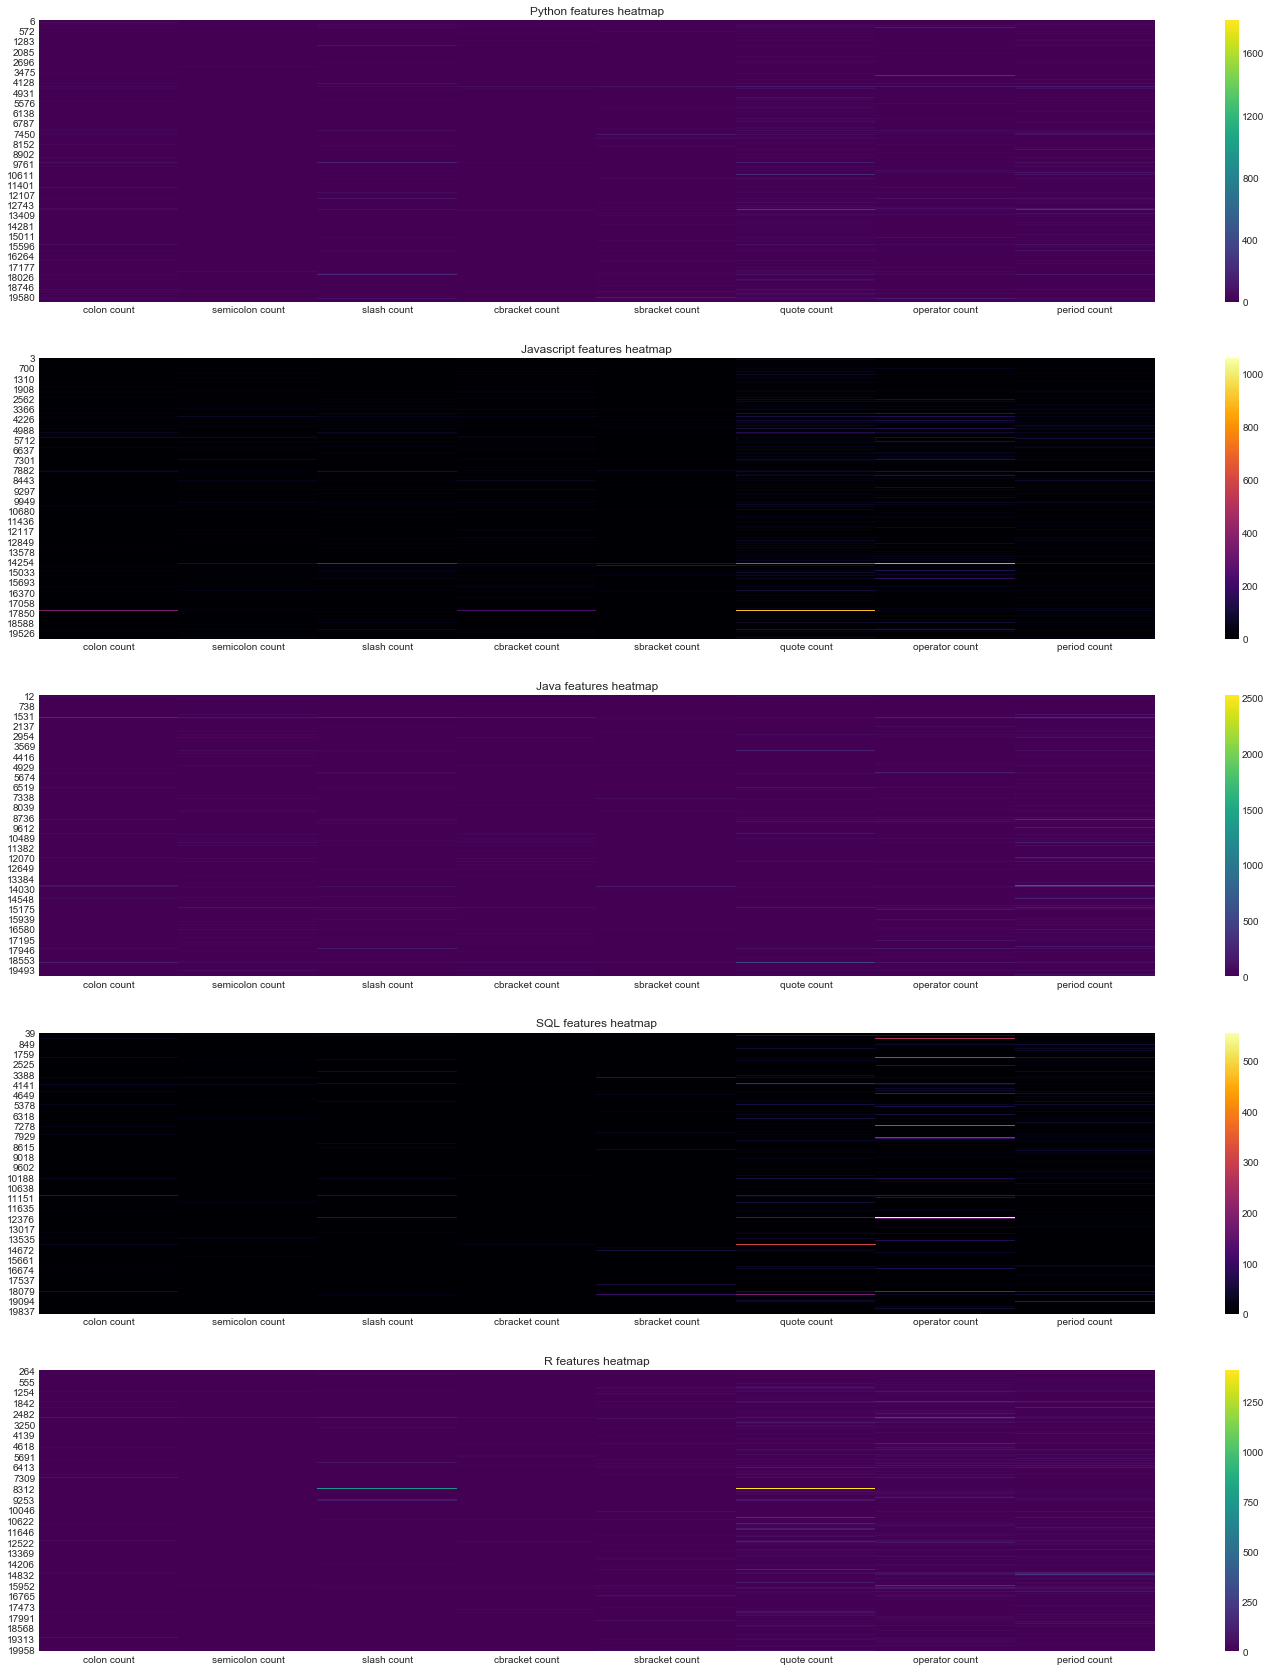

In [25]:
fig, axis = plt.subplots(figsize=(25,30), nrows = 5)

python_features = df[df['lang_label'] == 'python'].loc[:,'colon count':]
js_features = df[df['lang_label'] == 'javascript'].loc[:,'colon count':]
java_features = df[df['lang_label'] == 'java'].loc[:,'colon count':]
sql_features = df[df['lang_label'] == 'sql'].loc[:,'colon count':]
r_features = df[df['lang_label'] == 'r'].loc[:,'colon count':]

sql_features.head()

sns.heatmap(python_features, cmap = 'viridis', ax = axis[0])
axis[0].set_title('Python features heatmap')

sns.heatmap(js_features, cmap = 'inferno', ax = axis[1])
axis[1].set_title('Javascript features heatmap')

sns.heatmap(java_features, cmap = 'viridis', ax = axis[2])
axis[2].set_title('Java features heatmap')

sns.heatmap(sql_features, cmap = 'inferno', ax = axis[3])
axis[3].set_title('SQL features heatmap')

sns.heatmap(r_features, cmap = 'viridis', ax = axis[4])
axis[4].set_title('R features heatmap')

Text(0.5,1,'Syntactic Features of Programming Languages')

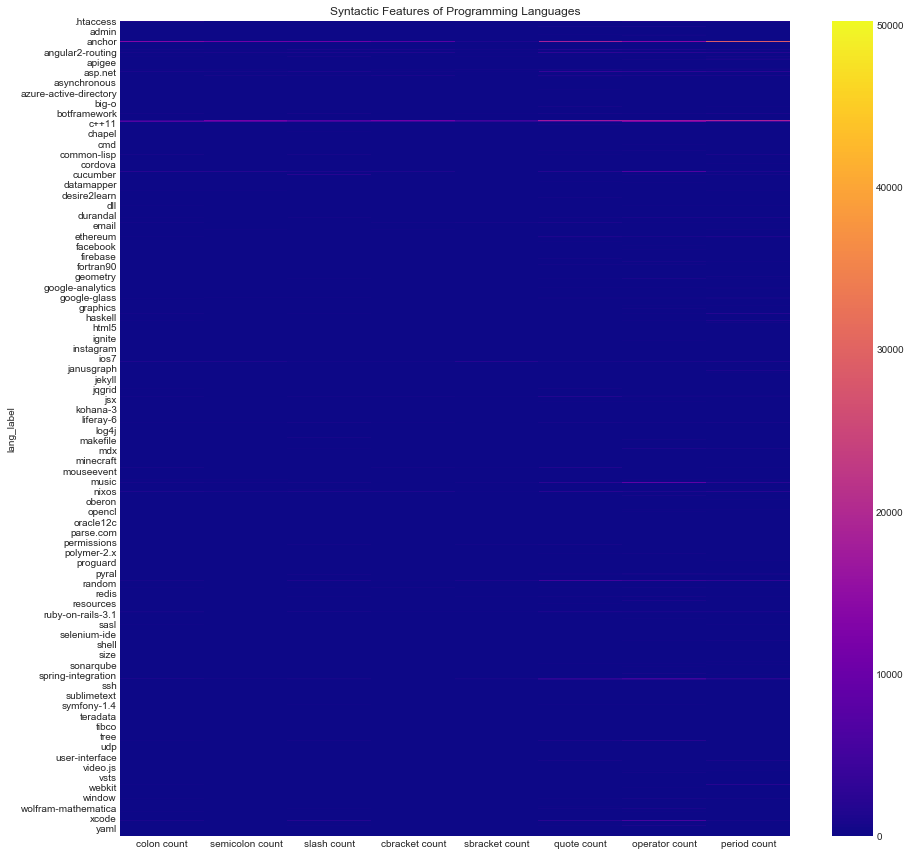

In [27]:
total_syntax_features =df.groupby('lang_label').sum(axis=1).loc[:,'colon count':]

fig, aggregate_axis = plt.subplots(figsize=(15,15))
sns.heatmap(total_syntax_features, cmap = 'plasma', ax = aggregate_axis)
aggregate_axis.set_title('Syntactic Features of Programming Languages')

Text(0.5,1,'Normalized Code Features')

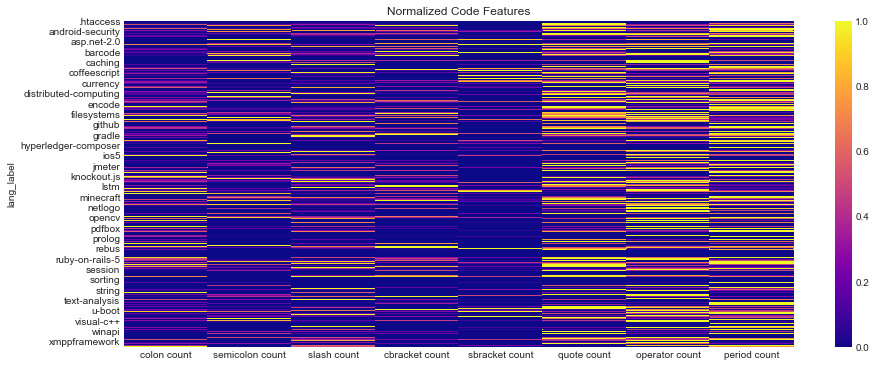

In [28]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
total_syntax_features_scaled = pd.DataFrame(min_max_scaler.fit_transform(total_syntax_features.T), columns = total_syntax_features.index, index = total_syntax_features.columns)
total_syntax_features_scaled.head(10)

fig, axis_scaled = plt.subplots(figsize=(15,6))
sns.heatmap(total_syntax_features_scaled.T, cmap = 'plasma', ax = axis_scaled)
axis_scaled.set_title('Normalized Code Features')

In [29]:
df.head()

,accepted_answer_id,answer_count,body,comment_count,community_owned_date,creation_date,favorite_count,id,last_activity_date,last_edit_date,...,length_of_question,code,colon count,semicolon count,slash count,cbracket count,sbracket count,quote count,operator count,period count
0,NaN,1,<p>I have a public class that contains a priva...,0,NaN,2011-01-27 20:19:13.563 UTC,NaN,4821394,2011-01-27 20:21:37.59 UTC,NaN,...,386,,0,0,0,0,0,0,0,0
1,3367943.0,2,<p>I have the following HTML:</p>\n\n<pre><cod...,2,NaN,2010-07-30 00:01:50.9 UTC,0.0,3367882,2012-05-10 14:16:05.143 UTC,2012-05-10 14:16:05.143 UTC,...,1095,<td class='a'>\n <img src='/images/some_icon....,6,6,5,4,4,8,25,4
2,NaN,0,<p>I'm trying to run a shell script with gradl...,2,NaN,2015-07-28 16:30:18.28 UTC,NaN,31682135,2015-07-28 16:32:15.117 UTC,NaN,...,928,"def test = project.tasks.create(""test"", Exec) ...",6,1,12,2,2,46,7,12
3,NaN,1,<p>I have an object with the following form.</...,1,NaN,2013-11-26 13:34:49.957 UTC,1.0,20218536,2013-11-26 15:07:50.8 UTC,2013-11-26 15:02:47.993 UTC,...,905,"sortedFilters:\n {\n task:{...},\n appo...",4,5,0,12,2,0,1,11
4,19941620.0,5,<p>Hi I need to valid the href is empty or not...,1,NaN,2013-11-12 22:41:36.11 UTC,NaN,19941459,2013-11-12 23:48:34.67 UTC,2013-11-12 22:43:42.97 UTC,...,952,"<a> <a name=""playback"" href=""""> var anchors = ...",0,5,2,9,8,13,7,6
